# Customer Churn Analysis

### Problem Statement

Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low. 

I will examine customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models. 

# Importing basic Libraries and Loading the Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Customer_Churn.csv') 
pd.set_option('display.max_columns',None)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


We have a dataset with different Categorical, Ordinal and Numeric Columns

# 1-Exploratory Data Analysis

## 1.1 Data Exploration

In [3]:
#checking the shape of dataset
df.shape

(7043, 21)

We have 7043 rows and 21 columns

In [4]:
#checking the columns of the dataset

df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

### Variable Description

**Target:**
1. Churn — Whether the customer churned or not (Yes, No)
**Numeric Features:**
1. * Tenure — Number of months the customer has been with the company
1. * MonthlyCharges — The monthly amount charged to the customer
1. * TotalCharges — The total amount charged to the customer
**Categorical Features:**
1. * CustomerID-A unique ID that identifies each customer.
1. * Gender — The customer’s gender: Male, Female
1. * SeniorCitizen — Whether the customer is a senior citizen or not (1, 0)
1. * Partner — Whether customer has a partner or not (Yes, No)
1. * Dependents — Whether customer has dependents or not (Yes, No)
1. * PhoneService — Whether the customer has a phone service or not (Yes, No)
1. * MulitpleLines — Whether the customer has multiple lines or not (Yes, No, No Phone Service)
1. * InternetService — Customer’s internet service type (DSL, Fiber Optic, None)
1. * OnlineSecurity — Whether the customer has Online Security add-on (Yes, No, No Internet Service)
1. * OnlineBackup — Whether the customer has Online Backup add-on (Yes, No, No Internet Service)
1. * DeviceProtection — Whether the customer has Device Protection add-on (Yes, No, No Internet Service)
1. * TechSupport — Whether the customer has Tech Support add-on (Yes, No, No Internet Service)
1. * StreamingTV — Whether the customer has streaming TV or not (Yes, No, No Internet Service)
1. * StreamingMovies — Whether the customer has streaming movies or not (Yes, No, No Internet Service)
1. * Contract — Term of the customer’s contract (Monthly, 1-Year, 2-Year)
1. * PaperlessBilling — Whether the customer has paperless billing or not (Yes, No)
1. * PaymentMethod — The customer’s payment method (E-Check, Mailed Check, Bank Transfer (Auto), Credit Card (Auto))

In [5]:
#Lets check the info of dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


**Observations:**
    
* We have No null values
* 1 Float type data, 2 INT type Data and 18 Categorical Data.
* We can see that Total Charges are in Object data type. This may be due to space or other Characters. we will check more.

In [6]:
df["TotalCharges"].value_counts()

          11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: TotalCharges, Length: 6531, dtype: int64

We can see empty Observations

In [7]:
#Checking for empty observations
df.loc[df['TotalCharges'] == " "]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [8]:
#Lets fill the empty observations with Nan

df["TotalCharges"]=df["TotalCharges"].replace(" ",np.nan)

In [9]:
#Lets check if there are Null values

df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

We have 11 missing observation in Total Charges

In [10]:
#first we will convert Totalcharges into Float type

df["TotalCharges"]=df["TotalCharges"].astype(float)

In [11]:
#Treating Missing values with mean Imputation Technique

df["TotalCharges"]=df["TotalCharges"].fillna(np.mean(df["TotalCharges"]))

In [12]:
#Lets check for Null values again

df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

We have no missing data now.

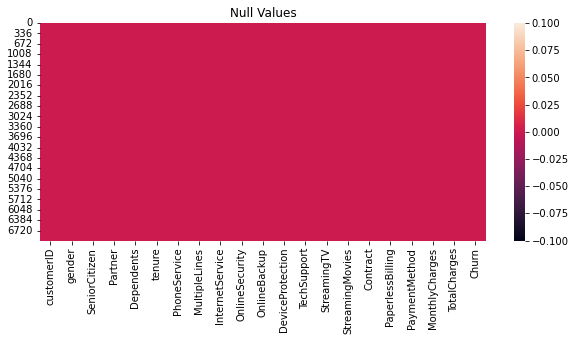

In [13]:
#Visualizeing null values

plt.figure(figsize=[10,4])
sns.heatmap(df.isnull())
plt.title("Null Values")
plt.show()

Heatmap is clear of missing data

In [14]:
#checking the unique value counts of each feature

df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [15]:
#dropping the CustomerID as its not relevant for my machine learning

df = df.drop(["customerID"],axis=1)

In [16]:
#Different types of variables are Categorical, ordinal, and numerical.

num_cols=["MonthlyCharges","TotalCharges","SeniorCitizen","tenure"]
cat_cols=["gender", "Partner", "Dependents", "PhoneService", "MultipleLines","OnlineSecurity",
          "OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies",
         "PaperlessBilling","Churn","InternetService", "PaymentMethod","Contract"]

In [17]:
#lets describe the dataset

df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
gender,7043,2,Male,3555,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SeniorCitizen,7043.0,NaN,NaN,NaN,0.162147,0.368612,0.0,0.0,0.0,0.0,1.0
Partner,7043,2,No,3641,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,7043,2,No,4933,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tenure,7043.0,NaN,NaN,NaN,32.371149,24.559481,0.0,9.0,29.0,55.0,72.0
PhoneService,7043,2,Yes,6361,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MultipleLines,7043,3,No,3390,NaN,NaN,NaN,NaN,NaN,NaN,NaN
InternetService,7043,3,Fiber optic,3096,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OnlineSecurity,7043,3,No,3498,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OnlineBackup,7043,3,No,3088,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Observations:**

* All the columns have count as 7043. no missing data or empty observations.
* For Categorical data, we have Top value and its frequency shown in the table above.
* Most customers use phone service in the dataset.
* Most customers prefer Paperless billing over other options.
* Maximum monthly charge is upto 118.75 and Maximum Total charges is upto 8684.8
* According to our dataset, Customer Attrition is lesser than retention.
* Mean and median of numerical columns are different. Skewness is present

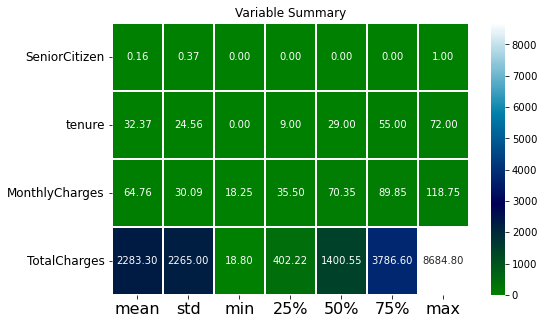

In [18]:
#Heatmap of the Describe function

plt.figure(figsize=(8,5))
sns.heatmap(round(df.describe()[1:].transpose(),2),linewidth=2,annot=True,fmt='.2f',cmap='ocean')
plt.xticks(fontsize=16)
plt.yticks(fontsize=12)
plt.title('Variable Summary')
plt.show()

TotalCharges have some outliers present

# 2 Data Visualization

## 2.1 Univariate Analysis

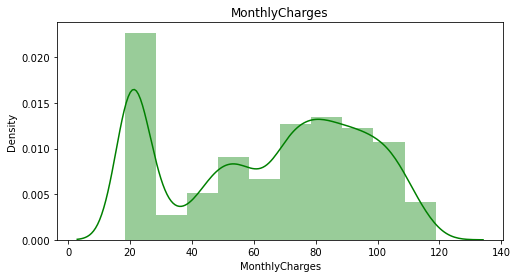

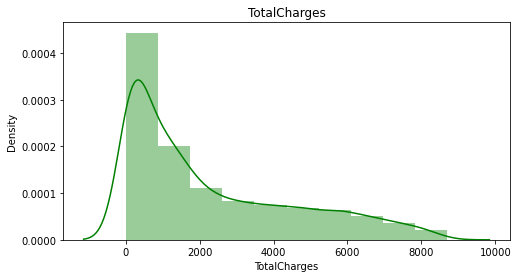

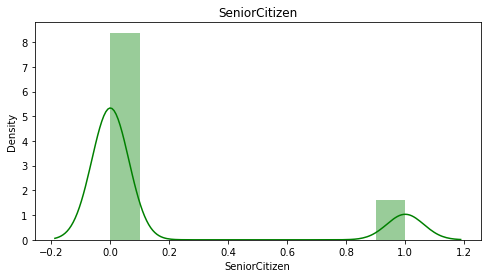

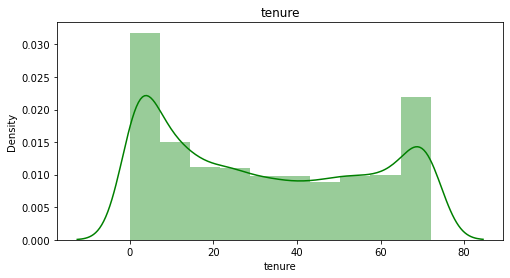

In [19]:
#Distribution plot for all numerical columns

for i in df[num_cols]:              
    plt.figure(figsize = (8, 4))
    sns.distplot(df[i], bins = 10, color="g")
    plt.title(i)
    plt.show()

We have skewness in the columns TotalCharges and Monthly Charges. SeniorCitizen comes under categorical data. tenure has a symmetrical distribution.

In [20]:
#Lets split the cat cols to small groups similar:

gpd=["gender", "Partner", "Dependents","Churn"]
pmo=["PhoneService", "MultipleLines","OnlineSecurity","OnlineBackup"]
dts=["DeviceProtection","TechSupport","StreamingTV","StreamingMovies"]
bill=["PaperlessBilling","InternetService", "PaymentMethod","Contract"]

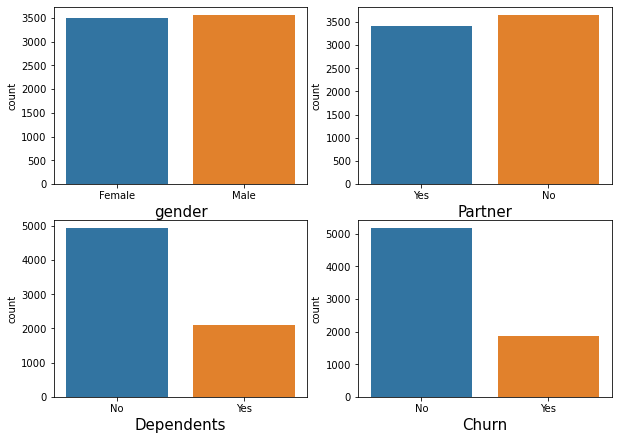

In [21]:
#the count of data for Categorical columns?

plt.figure(figsize=(10,15), facecolor='white')
plotnumber = 1

for i in df[gpd]:
    if plotnumber<=24 :
        ax = plt.subplot(4,2,plotnumber)
        sns.countplot(df[i])
        plt.xlabel(i,fontsize=15)
       
    plotnumber+=1
plt.show()

In [22]:
#lets check the unique values in categorical columns

for i in df[gpd]:
    print(df[i].value_counts())
    print('**************')
    print("               ")

Male      3555
Female    3488
Name: gender, dtype: int64
**************
               
No     3641
Yes    3402
Name: Partner, dtype: int64
**************
               
No     4933
Yes    2110
Name: Dependents, dtype: int64
**************
               
No     5174
Yes    1869
Name: Churn, dtype: int64
**************
               


**Observations:**

* We have Males slightly more than females.
* No Partner more than with partner.
* Most of the customers do not have dependents.
* Customer retention is more than Attrition.

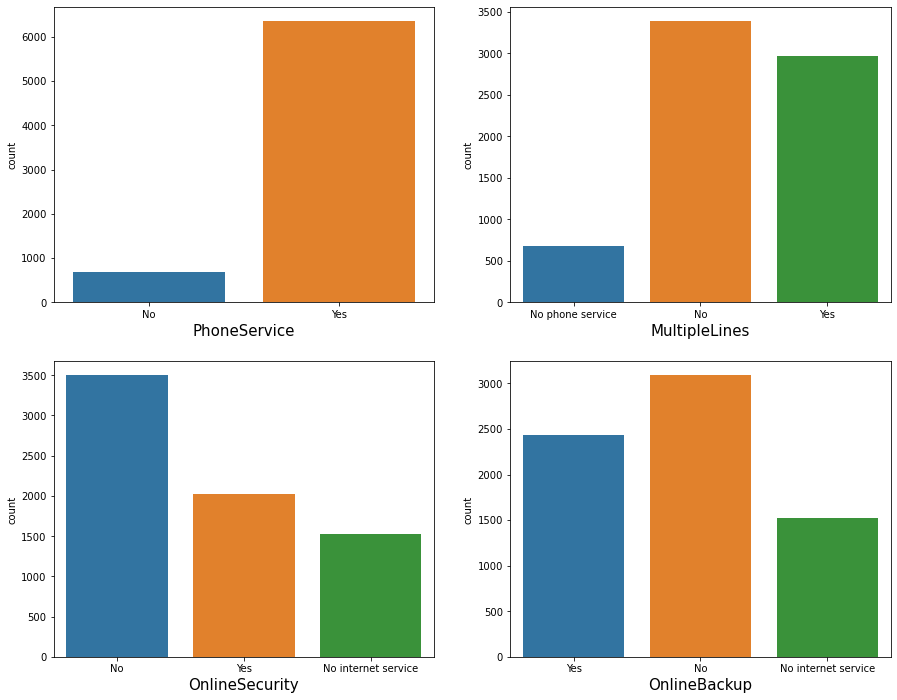

In [23]:
#the count of data for Categorical columns?

plt.figure(figsize=(15,25), facecolor='white')
plotnumber = 1

for i in df[pmo]:
    if plotnumber<=24 :
        ax = plt.subplot(4,2,plotnumber)
        sns.countplot(df[i])
        plt.xlabel(i,fontsize=15)
       
    plotnumber+=1
plt.show()

In [24]:
#lets check the unique values in categorical columns

for i in df[pmo]:
    print(df[i].value_counts())
    print('**************')
    print("               ")

Yes    6361
No      682
Name: PhoneService, dtype: int64
**************
               
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
**************
               
No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64
**************
               
No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64
**************
               


**Observations:**

* Almost 80% of customers use Phone service.
* Most of the Customers do not have multiple lines. and a few have no phone service
* Many Customers did not opt for Online Security and Online Backup and a few do not have Internet services.

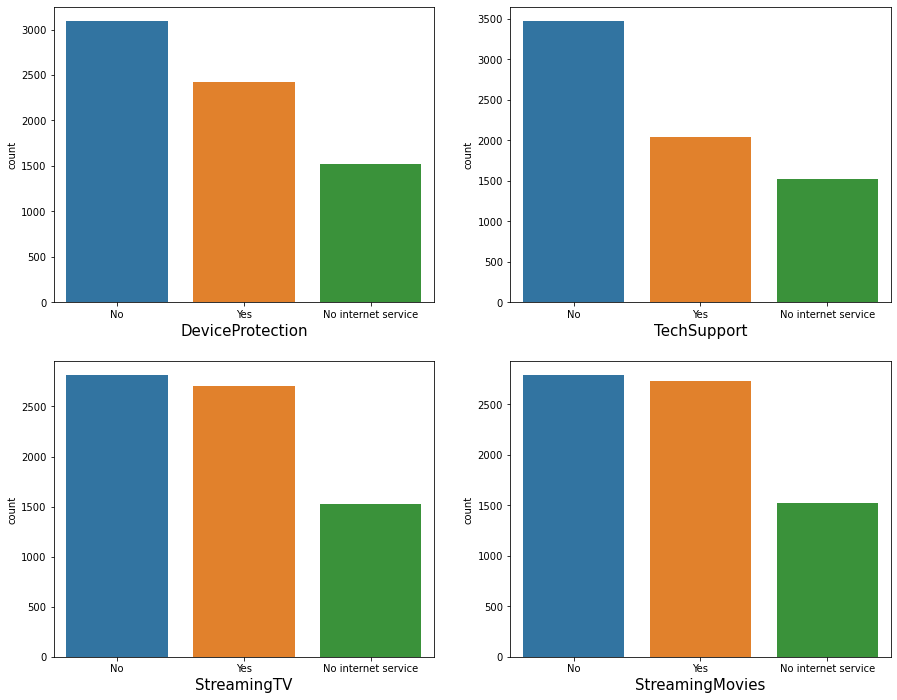

In [25]:
#the count of data for Categorical columns

plt.figure(figsize=(15,25), facecolor='white')
plotnumber = 1

for i in df[dts]:
    if plotnumber<=24 :
        ax = plt.subplot(4,2,plotnumber)
        sns.countplot(df[i])
        plt.xlabel(i,fontsize=15)
       
    plotnumber+=1
plt.show()

In [26]:
#lets check the unique values in categorical columns

for i in df[dts]:
    print(df[i].value_counts())
    print('**************')
    print("               ")

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64
**************
               
No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64
**************
               
No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64
**************
               
No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64
**************
               


**Observations:**

* Many Customers did not opt for Device protection and a few do not have internet services.
* Many Customers did not Add-on Tech support services.
* We have a pattern of slightly more for No than Yes for streaming TV.
* Same pattern for StreamingMovies.

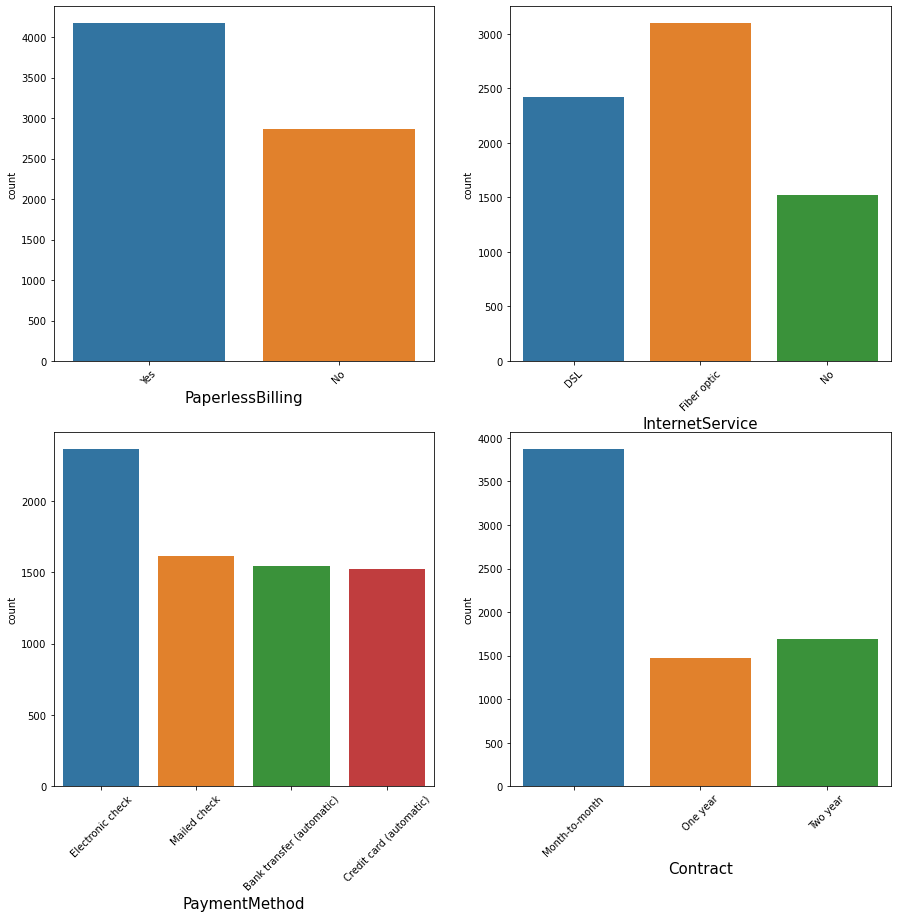

In [27]:
#the count of data for Categorical columns?

plt.figure(figsize=(15,30), facecolor='white')
plotnumber = 1

for i in df[bill]:
    if plotnumber<=24 :
        ax = plt.subplot(4,2,plotnumber)
        sns.countplot(df[i])
        plt.xlabel(i,fontsize=15)
        plt.xticks(rotation=45)
       
    plotnumber+=1
plt.show()

In [28]:
#lets check the unique values in categorical columns

for i in df[bill]:
    print(df[i].value_counts())
    print('**************')
    print("               ")

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64
**************
               
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64
**************
               
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64
**************
               
Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64
**************
               


**Observations:**

* Most customers prefer paperless billing
* Fiber optic is used by many customers than DSL.
* Electronic check is used by many customers than mailed check and automatic bank transfer and credit card transfer.
* Most customers have contract of Month to Month

#### 1526 customers out of the dataset do not have Internet Services.

## 2.2 Bivariate Analysis

In [29]:
#Lets plot a stacked plot of cat cols with target

def stacked_plot(df, group, target):
    fig, ax = plt.subplots(figsize = (6,4))
    temp_df = (df.groupby([group, target]).size()/df.groupby(group)[target].count()).reset_index().pivot(columns=target, index=group, values=0)
    temp_df.plot(kind='bar', stacked=True, ax = ax, color = ["green", "pink"])
    ax.xaxis.set_tick_params(rotation=0)
    ax.set_xlabel(group)
    ax.set_ylabel('Churn Percentage')

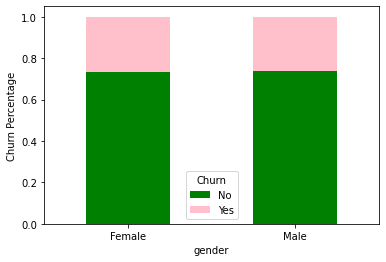

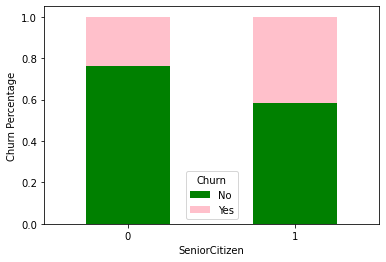

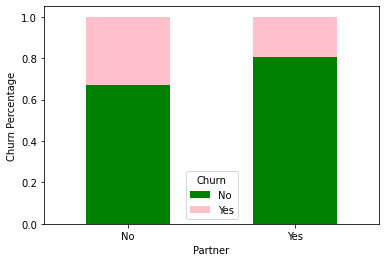

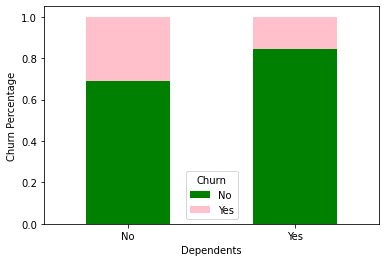

In [30]:
#lets check for gender, SeniorCitizen,Partner and Dependents

stacked_plot(df, "gender", "Churn")
stacked_plot(df, "SeniorCitizen", "Churn")
stacked_plot(df, "Partner", "Churn")
stacked_plot(df, "Dependents", "Churn")

**Observations:**

* Churn does not depend on Gender.
* Churn is more if the customer is a senior citizen.
* Churn is lesser when the customer took a partner service with thier partner.
* Churn is lesser when the customer has dependents.

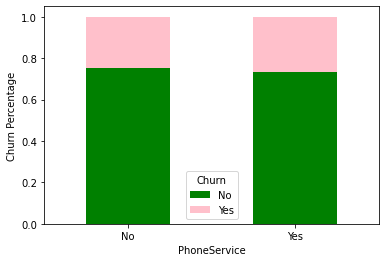

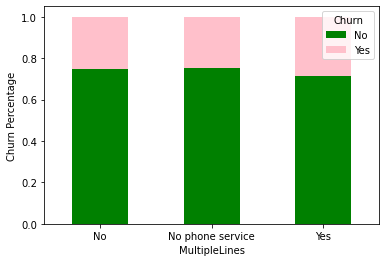

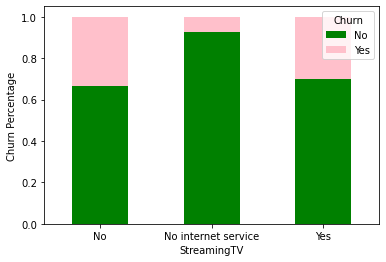

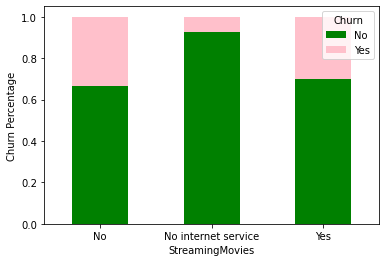

In [31]:
#lets check for phone service, MultipleLines,Streaming Tv and Streaming Movies

stacked_plot(df, "PhoneService", "Churn")
stacked_plot(df, "MultipleLines", "Churn")
stacked_plot(df, "StreamingTV", "Churn")
stacked_plot(df, "StreamingMovies", "Churn")

**Observations:**

* Churn does not depend on Phone service is yes or no
* Churn is slightly more if multiple lines is taken. 
* Churn is lesser for the ones with nmo internet services. but this all depend on other factors and not Streaming TV and movies alone.

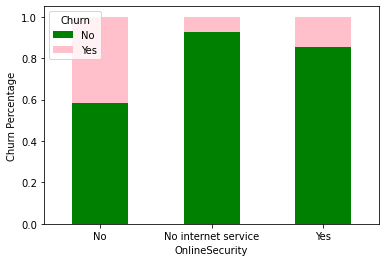

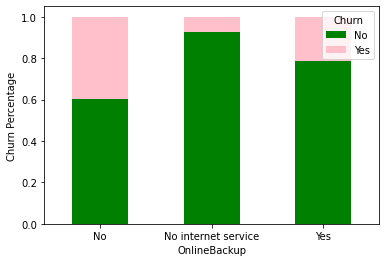

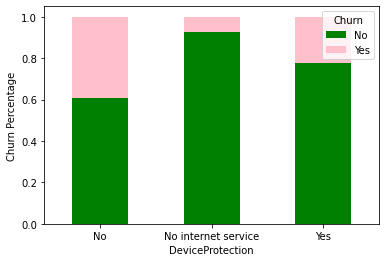

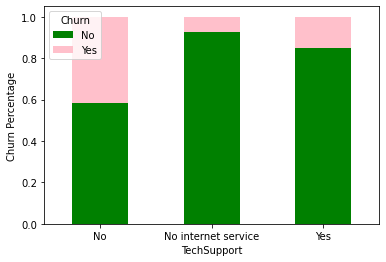

In [32]:
#lets check the rate of churn in OnlineBackup,DeviceProtection,TechSupport and Online Security

stacked_plot(df, "OnlineSecurity", "Churn")
stacked_plot(df, "OnlineBackup", "Churn")
stacked_plot(df, "DeviceProtection", "Churn")
stacked_plot(df, "TechSupport", "Churn")

**From above all plots we can see that Churn is lesser when no internet service option**

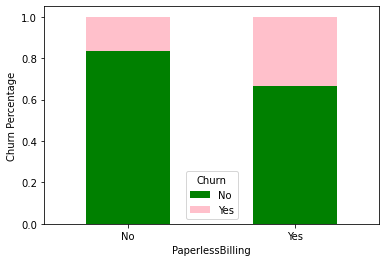

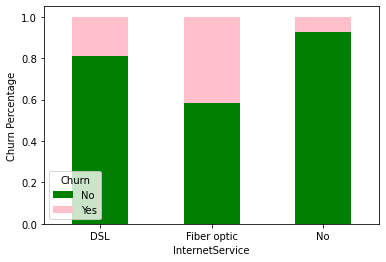

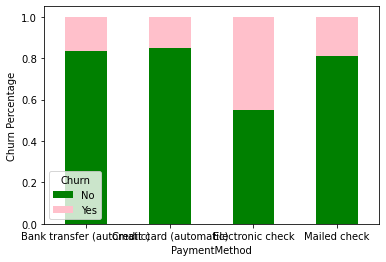

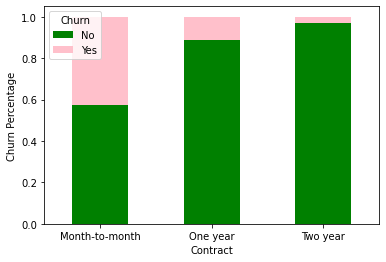

In [33]:
#lets check rate of churn in "PaperlessBilling","InternetService", "PaymentMethod","Contract"

stacked_plot(df, "PaperlessBilling", "Churn")
stacked_plot(df, "InternetService", "Churn")
stacked_plot(df, "PaymentMethod", "Churn")
stacked_plot(df, "Contract", "Churn")

**Observations:**

* if paperless billing is opted, there is more churn
* Churn is least for no internet service and high if Fibre optics is used by customer. this may be due to the expensive bill amount.
* Churn is more for customer opting for Electronic check method.
* churn is least for 2 year contract customers and highest for Month to Month. This is because of the early dispatching fee rendered by providers for those who wants to cancel thier service before contract ends. So churn is the least when there is a contract.

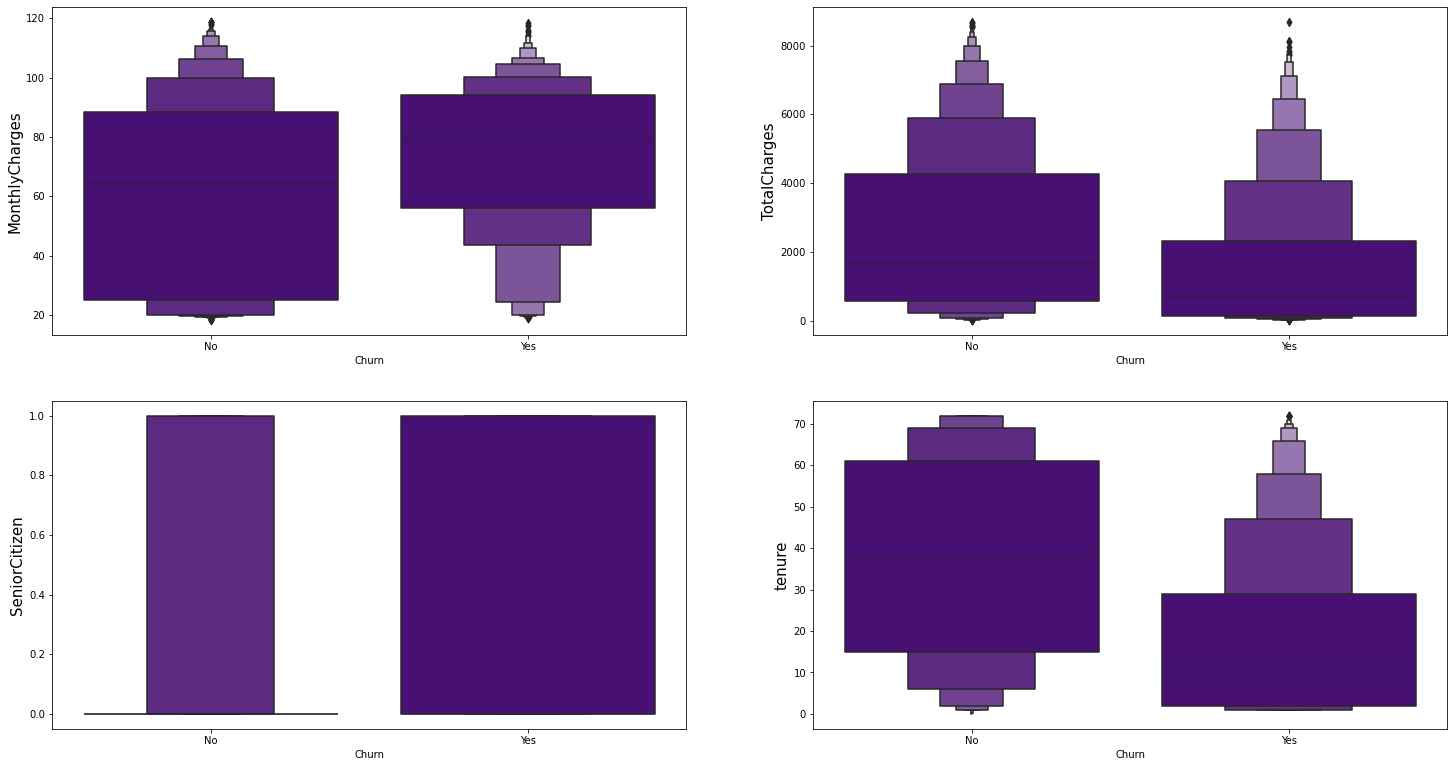

In [34]:
#lets check the numerical column and target relationship 

plt.figure(figsize=(25,35), facecolor='white')
plotnumber = 1

for i in df[num_cols]:
    if plotnumber<=24 :
        ax = plt.subplot(5,2,plotnumber)
        sns.boxenplot(x=df.Churn,y=df[i],color='indigo')
        plt.ylabel(i,fontsize=15)
       
    plotnumber+=1
plt.show()

**Observations**

* Monthly charges of 25 to 85 are less likely to churn than others. if you have charges from 60 to 90 chances of churn is more.
* Customers with yearly charges of 200 to 2100 are more prone to churn than others.
* Senior citizen tend to churn more.
* Customers with tenure 5 to 25 months are more likely to churn than others. 
* Customers with higher tenure are less likely to churn.

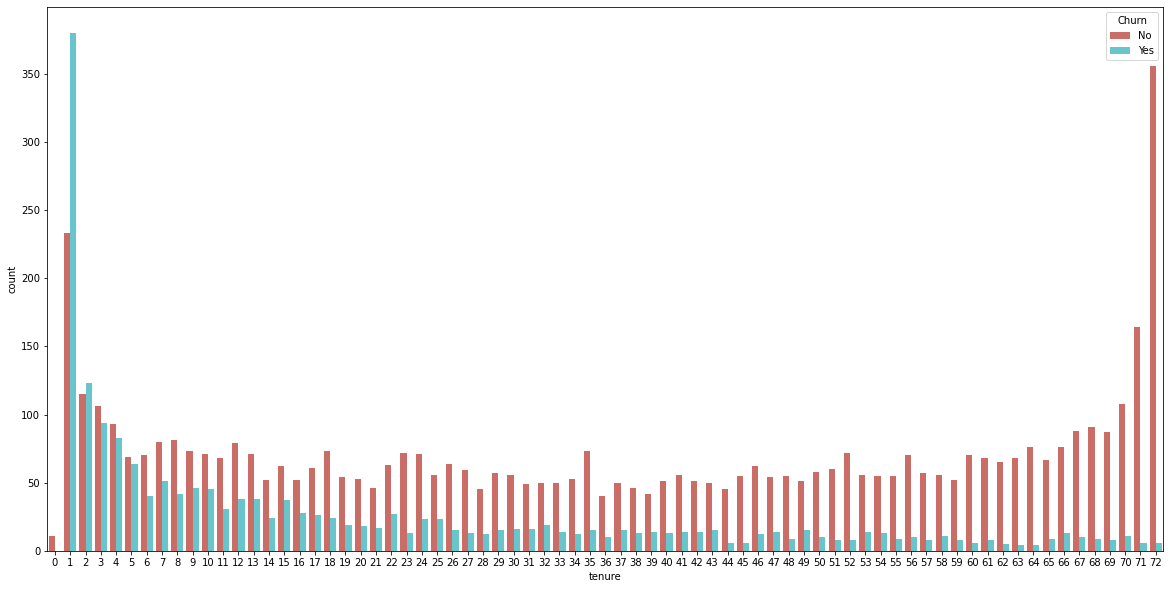

In [35]:
#lets check the detailed plot of tenure and Churn

plt.figure(figsize=(20,10))
sns.countplot(x="tenure", hue="Churn",palette="hls",data=df)
plt.show()

**Tenure and churn is correlated. As tenure increases, Churn reduces. churn is at the peak in the 1st month.**

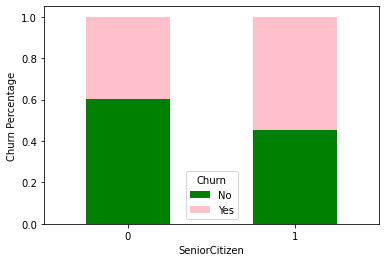

In [36]:
#Lets check senior citizen with contract and thier churn

stacked_plot(df[df.Contract == "Month-to-month"], "SeniorCitizen", "Churn")

**We can see that Senior citizens with Month to month option are more likely to churn than non senior citizens.**

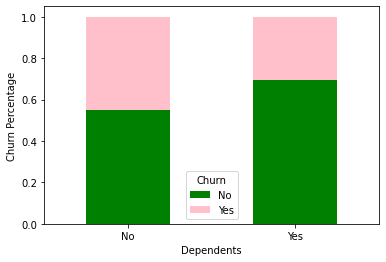

In [37]:
#lets check dependents and the internet service with churn

stacked_plot(df[df.InternetService == "Fiber optic"], "Dependents", "Churn")

**For the customers with dependents churn is lesser when fibre optic is used**

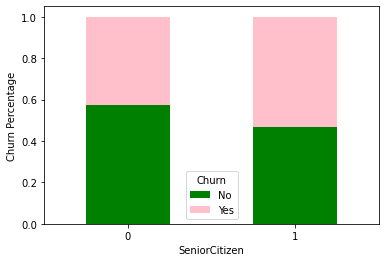

In [38]:
##Lets check payment method and senior citizen with churn

stacked_plot(df[df.PaymentMethod == "Electronic check"], "SeniorCitizen", "Churn")

**Customer churn is more for senior citizens than non senior citizens if payment method is Electronic check**

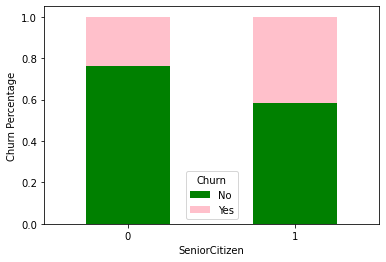

In [39]:
#lets check senior citizen with churn

stacked_plot(df, "SeniorCitizen", "Churn")

**Churn is more senior citizens than non senior citizens**

<AxesSubplot:xlabel='tenure', ylabel='MonthlyCharges'>

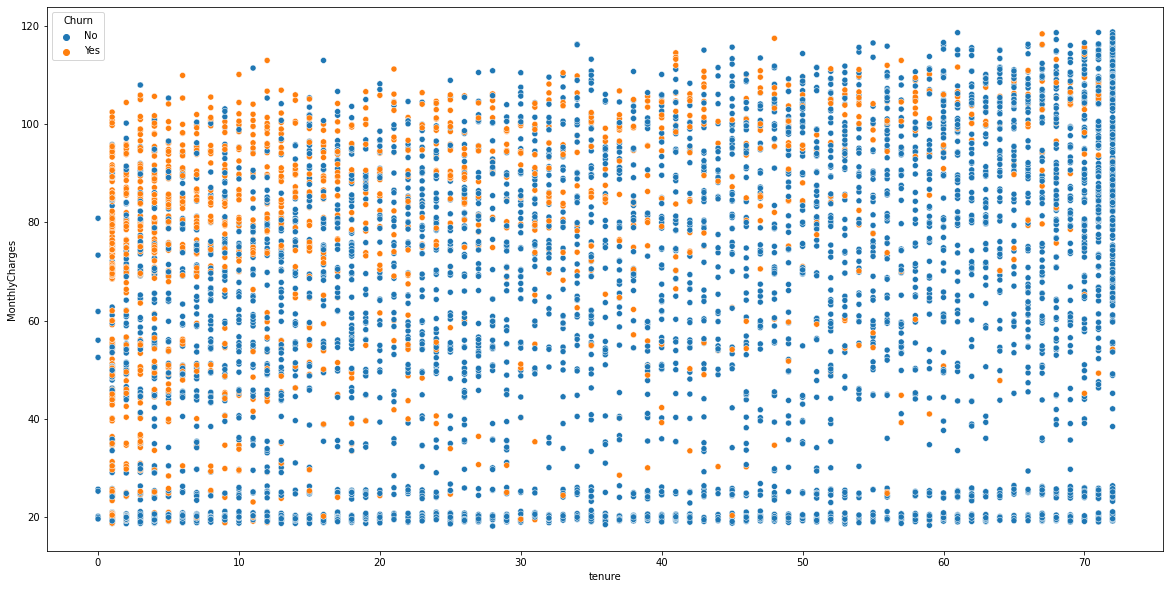

In [40]:
#lets check scatter plot of Monthly charges and tenure with churn

plt.figure(figsize=(20,10))
sns.scatterplot(df['tenure'],df['MonthlyCharges'],hue=df['Churn'])

**Observations:**

* The churn is more for the lower tenure and higher Monthlycharges.
* As tenure increases, Churn is lesser when monthly charges are less and churn happens only at higher monthly charges.

<AxesSubplot:xlabel='tenure', ylabel='TotalCharges'>

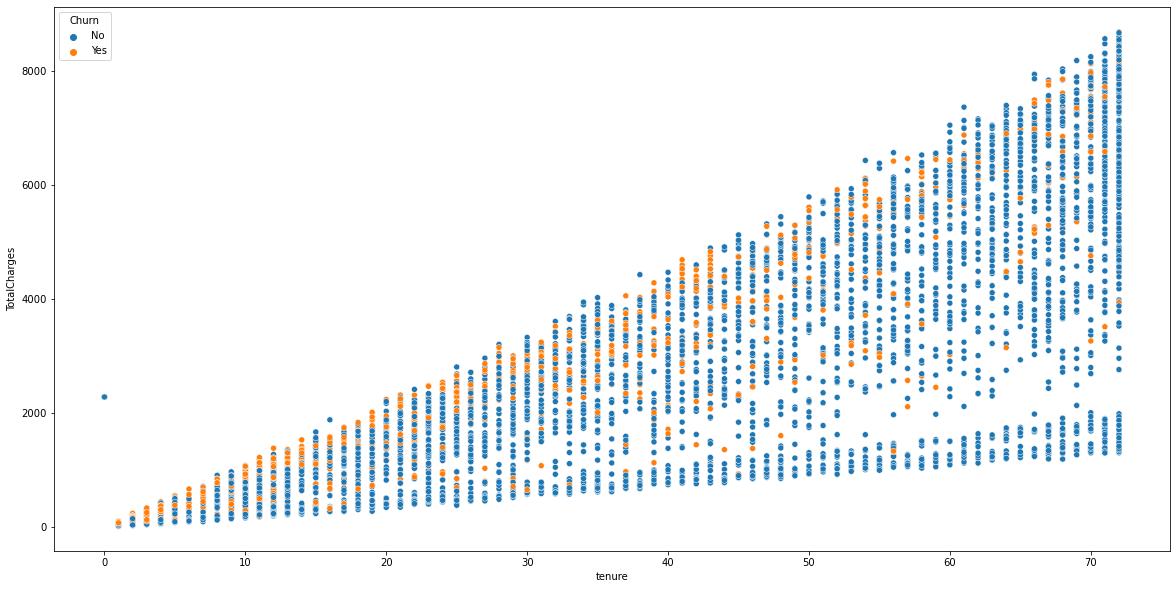

In [41]:
#lets check scatter plot of Total charges and tenure with churn

plt.figure(figsize=(20,10))
sns.scatterplot(df['tenure'],df['TotalCharges'],hue=df['Churn'])

**Observations:**

* As tenure increases, Total Charges.
* Churn is more at tenures less than15 montrhs.
* Churn is lesser at when tenure is more and that to happens only at higher charges.

## 2.3 Multivariate Analysis

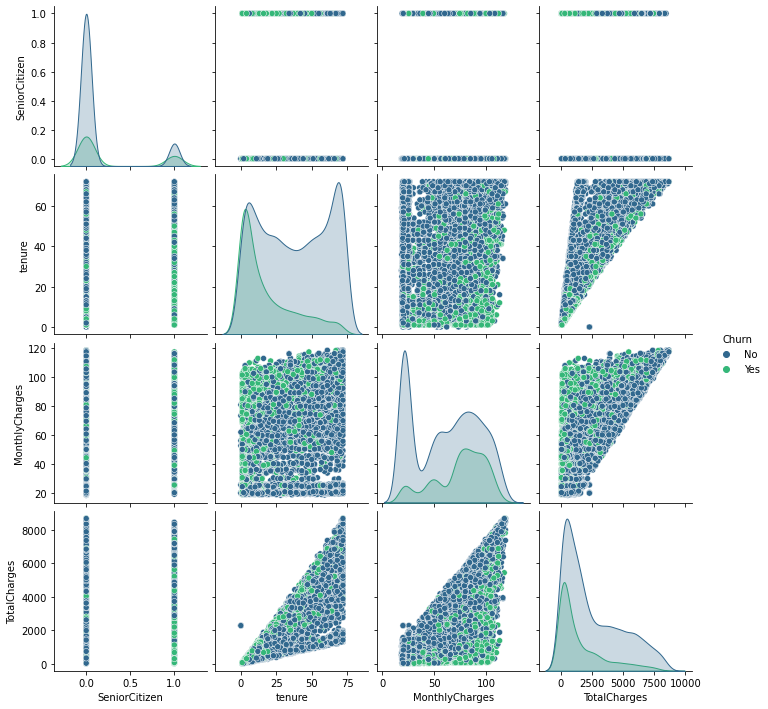

In [43]:
#pair ploting for target

sns.pairplot(df,hue="Churn",palette='viridis')

# 3- Data Cleaning and Feature Engineering

## 3.1 Outliers

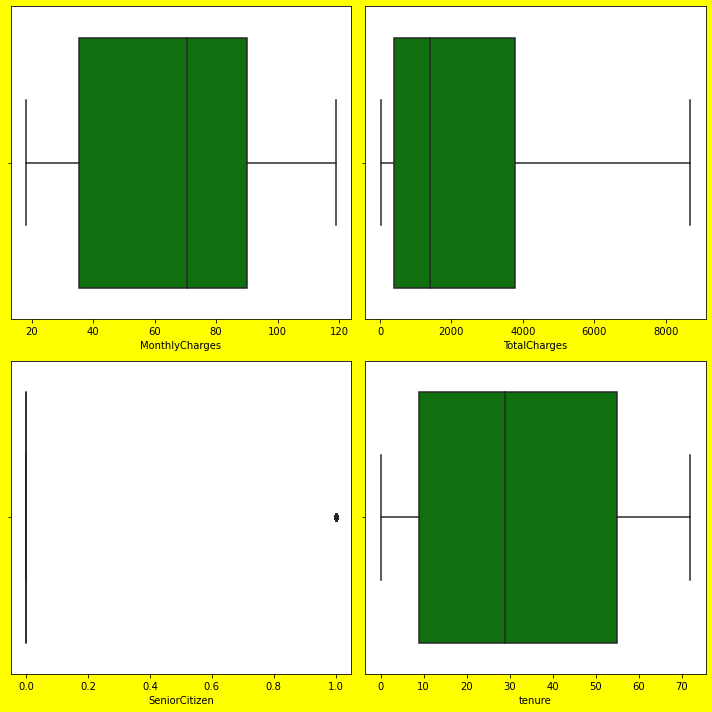

In [44]:
plt.figure(figsize=(10,10),facecolor='yellow')
graph=1 

for column in num_cols:

    plt.subplot(2,2,graph)

    sns.boxplot(df[column],color='green',orient='h')

    plt.xlabel(column,fontsize=10)

    graph+=1

    plt.tight_layout()

#### We have Outliers in Senior Citizen but we cannot take it as its a Categorical type data.

## 3.2 Skewnes

In [46]:
#checking the skewness

df.skew()

SeniorCitizen     1.833633
tenure            0.239540
MonthlyCharges   -0.220524
TotalCharges      0.962394
dtype: float64

We have skewness in Senior Citizen and TotalCharges. But seniorCitizen is a categorical data so we need not remove skewness from it.


In [48]:
#Using Power transformer to remove skewness in TotalCharges

skew_cols=["TotalCharges"]

from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
df[skew_cols] = scaler.fit_transform(df[skew_cols].values)

In [49]:
#Checking the skewness again

df.skew()

SeniorCitizen     1.833633
tenure            0.239540
MonthlyCharges   -0.220524
TotalCharges     -0.144899
dtype: float64

Skewness is removed

<AxesSubplot:xlabel='TotalCharges', ylabel='Density'>

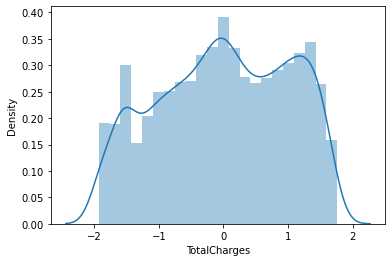

In [50]:
#check plot for Total charges now

sns.distplot(df['TotalCharges'])

We got a symmetrical distribution

## 3.3 Encoding

In [51]:
# Separating categorical columns in df

cat_cols=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        cat_cols.append(i)
print(cat_cols)

['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


In [53]:
#Encoding using Ordinal encoder

from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()

for i in cat_cols:
    df[i]=enc.fit_transform(df[i].values.reshape(-1,1))

In [54]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0.0,0,1.0,0.0,1,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.85,-1.810588,0.0
1,1.0,0,0.0,0.0,34,1.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,3.0,56.95,0.253313,0.0
2,1.0,0,0.0,0.0,2,1.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,53.85,-1.387269,1.0
3,1.0,0,0.0,0.0,45,0.0,1.0,0.0,2.0,0.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,42.30,0.232253,0.0
4,0.0,0,0.0,0.0,2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,70.70,-1.250118,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1.0,0,1.0,1.0,24,1.0,2.0,0.0,2.0,0.0,2.0,2.0,2.0,2.0,1.0,1.0,3.0,84.80,0.295688,0.0
7039,0.0,0,1.0,1.0,72,1.0,2.0,1.0,0.0,2.0,2.0,0.0,2.0,2.0,1.0,1.0,1.0,103.20,1.567097,0.0
7040,0.0,0,1.0,1.0,11,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.60,-0.859899,0.0
7041,1.0,1,1.0,0.0,4,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,74.40,-0.922968,1.0


Our data is clean from outliers, missing data, skewness and categorical columns are encoded.

## 3.4 Correlation

In [55]:
df.corr()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001874,-0.001808,0.010517,0.005106,-0.006488,-0.006739,-0.000863,-0.015017,-0.012057,0.000549,-0.006825,-0.006421,-0.008743,0.000126,-0.011754,0.017352,-0.014569,-0.002691,-0.008612
SeniorCitizen,-0.001874,1.000000,0.016479,-0.211185,0.016567,0.008576,0.146185,-0.032310,-0.128221,-0.013632,-0.021398,-0.151268,0.030776,0.047266,-0.142554,0.156530,-0.038551,0.220173,0.105478,0.150889
Partner,-0.001808,0.016479,1.000000,0.452676,0.379697,0.017706,0.142410,0.000891,0.150828,0.153130,0.166330,0.126733,0.137341,0.129574,0.294806,-0.014877,-0.154798,0.096848,0.344618,-0.150448
Dependents,0.010517,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024991,0.044590,0.152166,0.091015,0.080537,0.133524,0.046885,0.021321,0.243187,-0.111377,-0.040292,-0.113890,0.087831,-0.164221
tenure,0.005106,0.016567,0.379697,0.159712,1.000000,0.008448,0.343032,-0.030359,0.325468,0.370876,0.371105,0.322942,0.289373,0.296866,0.671607,0.006152,-0.370436,0.247900,0.865270,-0.352229
PhoneService,-0.006488,0.008576,0.017706,-0.001762,0.008448,1.000000,-0.020538,0.387436,-0.015198,0.024105,0.003727,-0.019158,0.055353,0.043870,0.002247,0.016505,-0.004184,0.247398,0.084371,0.011942
MultipleLines,-0.006739,0.146185,0.142410,-0.024991,0.343032,-0.020538,1.000000,-0.109216,0.007141,0.117327,0.122318,0.011466,0.175059,0.180957,0.110842,0.165146,-0.176793,0.433576,0.458682,0.038037
InternetService,-0.000863,-0.032310,0.000891,0.044590,-0.030359,0.387436,-0.109216,1.000000,-0.028416,0.036138,0.044944,-0.026047,0.107417,0.098350,0.099721,-0.138625,0.086140,-0.323260,-0.207654,-0.047291
OnlineSecurity,-0.015017,-0.128221,0.150828,0.152166,0.325468,-0.015198,0.007141,-0.028416,1.000000,0.185126,0.175985,0.285028,0.044669,0.055954,0.374416,-0.157641,-0.096726,-0.053878,0.242515,-0.289309
OnlineBackup,-0.012057,-0.013632,0.153130,0.091015,0.370876,0.024105,0.117327,0.036138,0.185126,1.000000,0.187757,0.195748,0.147186,0.136722,0.280980,-0.013370,-0.124847,0.119777,0.344209,-0.195525


We will get more info with visualization

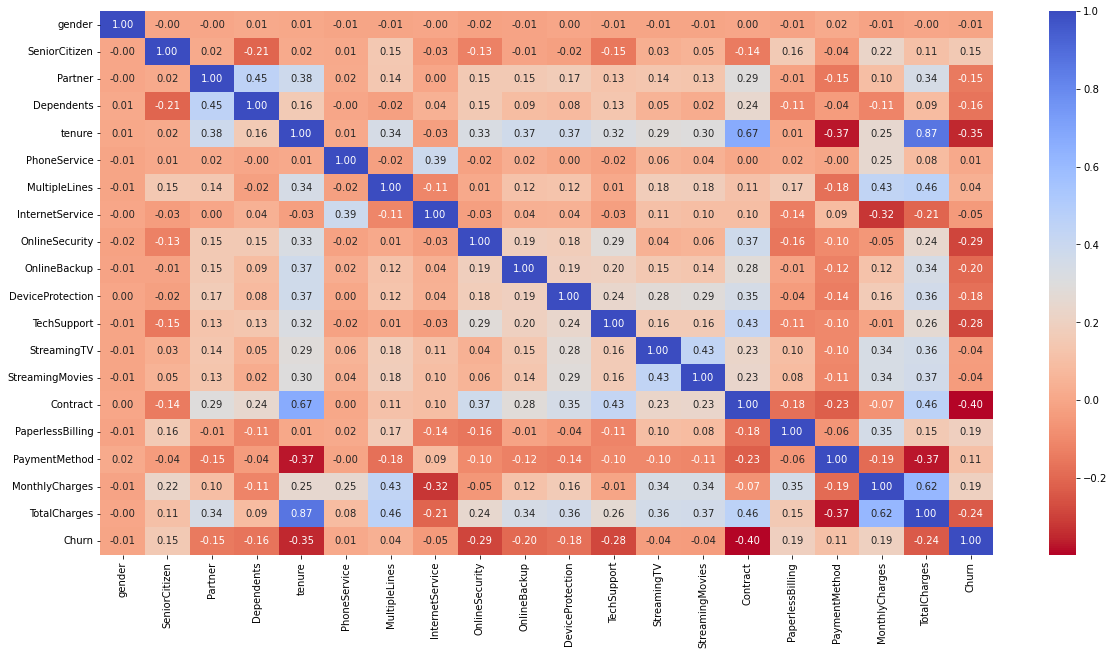

In [58]:
#Correlation Heat map

corr = df.corr()
plt.figure(figsize=(20,10), facecolor='white')
sns.heatmap(corr, annot=True,cmap='coolwarm_r',fmt='.2f')
plt.show()

**Observations:**

* Multicollinearity is present in the dataset.
* We have multicollinearity between tenure and TotalCharges.
* We have Multicollinearity between tenure and Contract.
* We have multicollinearity between MonthlyCharges and TotalCharges.
* Our target variable has the highest correlation with Contract followed by tenure.
* Our target variable has least correlation with Gender and PhoneService

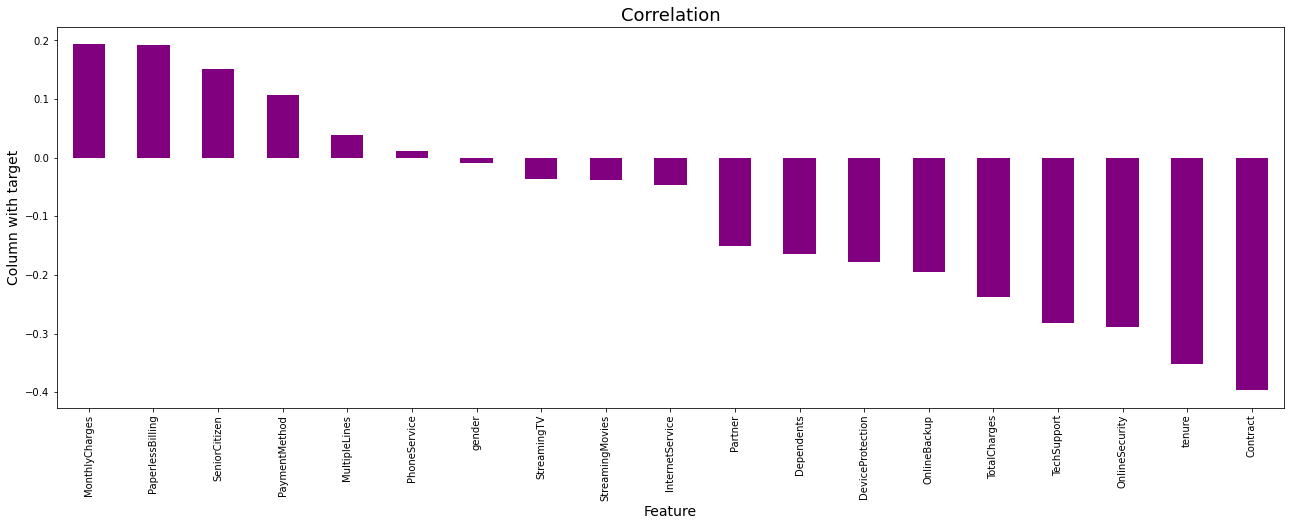

In [60]:
#Visualization of correlation:

plt.figure(figsize=(22,7))
df.corr()['Churn'].sort_values(ascending=False).drop(['Churn']).plot(kind='bar',color='purple')
plt.xlabel('Feature',fontsize=14)
plt.ylabel("Column with target",fontsize=14)
plt.title("Correlation",fontsize=18)
plt.show()

* Most correlated with MonthlyCharges, Paperless billing, Contract, tenure and Online Security.
* Least Correlated with gender, PhoneService.

## 3.5 Data splitting

In [61]:
x = df.drop("Churn",axis=1)
y = df["Churn"]

In [63]:
x.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0.0,0,1.0,0.0,1,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.85,-1.810588
1,1.0,0,0.0,0.0,34,1.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,3.0,56.95,0.253313
2,1.0,0,0.0,0.0,2,1.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,53.85,-1.387269
3,1.0,0,0.0,0.0,45,0.0,1.0,0.0,2.0,0.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,42.30,0.232253
4,0.0,0,0.0,0.0,2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,70.70,-1.250118


In [64]:
x.shape

(7043, 19)

In [65]:
y.head()

0    0.0
1    0.0
2    1.0
3    0.0
4    1.0
Name: Churn, dtype: float64

In [66]:
y.shape

(7043,)

## 3.6 Standardization

In [67]:
#using Standard scaler to normalize the data

from sklearn.preprocessing import StandardScaler

ssc=StandardScaler()

x= pd.DataFrame(ssc.fit_transform(x), columns=x.columns)

In [68]:
x

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,-1.009559,-0.439916,1.034530,-0.654012,-1.277445,-3.054010,0.062723,-1.183234,-0.918838,1.242550,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,0.398558,-1.160323,-1.810588
1,0.990532,-0.439916,-0.966622,-0.654012,0.066327,0.327438,-0.991588,-1.183234,1.407321,-1.029919,1.245111,-0.925262,-1.113495,-1.121405,0.371271,-1.205113,1.334863,-0.259629,0.253313
2,0.990532,-0.439916,-0.966622,-0.654012,-1.236724,0.327438,-0.991588,-1.183234,1.407321,1.242550,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,1.334863,-0.362660,-1.387269
3,0.990532,-0.439916,-0.966622,-0.654012,0.514251,-3.054010,0.062723,-1.183234,1.407321,-1.029919,1.245111,1.396299,-1.113495,-1.121405,0.371271,-1.205113,-1.474052,-0.746535,0.232253
4,-1.009559,-0.439916,-0.966622,-0.654012,-1.236724,0.327438,-0.991588,0.172250,-0.918838,-1.029919,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,0.398558,0.197365,-1.250118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.990532,-0.439916,1.034530,1.529024,-0.340876,0.327438,1.117034,-1.183234,1.407321,-1.029919,1.245111,1.396299,1.146547,1.138411,0.371271,0.829798,1.334863,0.665992,0.295688
7039,-1.009559,-0.439916,1.034530,1.529024,1.613701,0.327438,1.117034,0.172250,-0.918838,1.242550,1.245111,-0.925262,1.146547,1.138411,0.371271,0.829798,-0.537747,1.277533,1.567097
7040,-1.009559,-0.439916,1.034530,1.529024,-0.870241,-3.054010,0.062723,-1.183234,1.407321,-1.029919,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,0.398558,-1.168632,-0.859899
7041,0.990532,2.273159,1.034530,-0.654012,-1.155283,0.327438,1.117034,0.172250,-0.918838,-1.029919,-1.027910,-0.925262,-1.113495,-1.121405,-0.828207,0.829798,1.334863,0.320338,-0.922968


Our data is standardized.

## 3.7 Multicollinearity/VIF Factor

In [69]:
#Checking Multicollinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor

def vif_calc():
    vif=pd.DataFrame()
    vif["VIF Factor"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    vif["features"]=x.columns
    print(vif)

In [70]:
vif_calc()

    VIF Factor          features
0     1.001684            gender
1     1.149730     SeniorCitizen
2     1.463075           Partner
3     1.384396        Dependents
4    10.690305            tenure
5     1.622399      PhoneService
6     1.397403     MultipleLines
7     1.866643   InternetService
8     1.252550    OnlineSecurity
9     1.188767      OnlineBackup
10    1.284957  DeviceProtection
11    1.309099       TechSupport
12    1.444633       StreamingTV
13    1.443068   StreamingMovies
14    2.508121          Contract
15    1.203254  PaperlessBilling
16    1.181338     PaymentMethod
17    4.794140    MonthlyCharges
18   13.688514      TotalCharges


We have Multicollinearity in TotalCharges and tenure. We have Monthly charges already in the dataset, so we can remove totalcharges column.

In [71]:
#Droping highly VIF column

x = x.drop(["TotalCharges"],axis=1)

In [72]:
vif_calc()

    VIF Factor          features
0     1.001684            gender
1     1.149639     SeniorCitizen
2     1.460856           Partner
3     1.382106        Dependents
4     2.754468            tenure
5     1.622282      PhoneService
6     1.391652     MultipleLines
7     1.825876   InternetService
8     1.247696    OnlineSecurity
9     1.185932      OnlineBackup
10    1.280152  DeviceProtection
11    1.303573       TechSupport
12    1.443671       StreamingTV
13    1.442276   StreamingMovies
14    2.459201          Contract
15    1.202918  PaperlessBilling
16    1.180664     PaymentMethod
17    2.733024    MonthlyCharges


Multicollinearity issue is resolved completely

## 3.8 SMOTE Technique for Imbalnced Data

0.0    5174
1.0    1869
Name: Churn, dtype: int64


<AxesSubplot:xlabel='Churn', ylabel='count'>

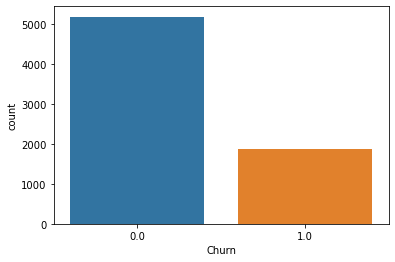

In [73]:
#Checking the count of Loan_Status

print(y.value_counts())
sns.countplot(y)

We have an imbalanced dataset of target variable.

In [75]:
#Importing SMOTE and using it to balance

from imblearn.over_sampling import SMOTE

smt = SMOTE()
x,y = smt.fit_resample(x,y)

0.0    5174
1.0    5174
Name: Churn, dtype: int64


<AxesSubplot:xlabel='Churn', ylabel='count'>

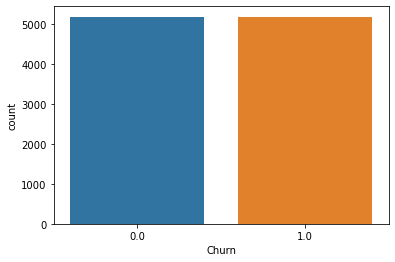

In [76]:
#Rechecking the count of Loan_Status

print(y.value_counts())
sns.countplot(y)

Our dataset target is balanced now

# 4 Model Building

#### We have a classification type problem

In [77]:
#Importing Ml Libraries

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_curve, roc_auc_score, accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, recall_score, confusion_matrix, \
precision_score, f1_score, accuracy_score, classification_report

## 4.1 Logistic Regression

In [78]:
#Finding the Best Random State

Accu=0
RS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =i)
    lr=LogisticRegression()
    lr.fit(x_train, y_train)
    pred = lr.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>Accu:
        Accu=acc
        RS=i
print("Best accuracy is ",Accu," on Random_state ",RS)

Best accuracy is  0.7855072463768116  on Random_state  40


In [79]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =RS)

lr=LogisticRegression()

lr.fit(x_train,y_train)
lr.score(x_train,y_train)
pred_lr=lr.predict(x_test)
print('Accuracy score of Logistic Regression is:')
print(accuracy_score(y_test,pred_lr))
print(confusion_matrix(y_test,pred_lr))
print(classification_report(y_test,pred_lr))

Accuracy score of Logistic Regression is:
0.7855072463768116
[[1122  386]
 [ 280 1317]]
              precision    recall  f1-score   support

         0.0       0.80      0.74      0.77      1508
         1.0       0.77      0.82      0.80      1597

    accuracy                           0.79      3105
   macro avg       0.79      0.78      0.78      3105
weighted avg       0.79      0.79      0.79      3105



* We have Accuracy of 78.55%.
* Precision is at 80% and Recall at 74%. Lets check the confusuion Matrix

In [80]:
#HyperParameter Tuning of LR

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=RS)

lr_grid_param={'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
               'penalty':['none', 'elasticnet', 'l1', 'l2'],
               'C':[0.001, 0.01, 0.1, 1, 10, 100]}

gd_sr=GridSearchCV(estimator=lr,param_grid=lr_grid_param,cv=5,verbose=0)

gd_sr.fit(x,y)

best_parameters=gd_sr.best_params_
print(best_parameters)

print(gd_sr.best_score_)

{'C': 0.01, 'penalty': 'l2', 'solver': 'newton-cg'}
0.7734837478956671


In [81]:
#Reinstating the tuned parameters:


lr=LogisticRegression(C=0.01,solver='newton-cg',penalty='l2')

lr.fit(x_train,y_train)
lr.score(x_train,y_train)
predlr=lr.predict(x_test)
print('Accuracy score of Logistic Regression is:')
print(accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

Accuracy score of Logistic Regression is:
0.785829307568438
[[1117  391]
 [ 274 1323]]
              precision    recall  f1-score   support

         0.0       0.80      0.74      0.77      1508
         1.0       0.77      0.83      0.80      1597

    accuracy                           0.79      3105
   macro avg       0.79      0.78      0.78      3105
weighted avg       0.79      0.79      0.79      3105



The accuracy is increased by 0.03% only

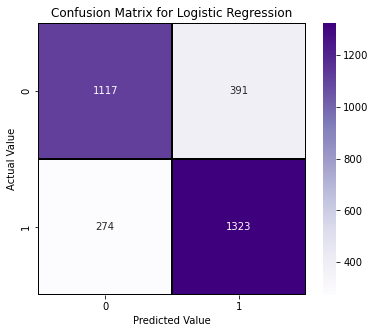

In [82]:
#Plotting the confusion Matrix,took predicted values from model without hyperparameter tuning

cm = confusion_matrix(y_test, predlr)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f, ax = plt.subplots(figsize =(6,5))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("Predicted Value")
plt.ylabel("Actual Value")
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

## 4.2 Decision Tree Classifier

In [83]:
#Finding the best Randomstate:

Accu=0
RS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =i)
    dt = DecisionTreeClassifier()
    dt.fit(x_train, y_train)
    pred = dt.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>Accu:
        Accu=acc
        RS=i
print("Best accuracy is ",Accu," on Random_state ",RS)

Best accuracy is  0.8061191626409018  on Random_state  4


In [84]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =RS)

dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)
pred_dtc=dtc.predict(x_test)
print(accuracy_score(y_test,pred_dtc))
print(confusion_matrix(y_test,pred_dtc))
print(classification_report(y_test,pred_dtc))

0.8051529790660226
[[1250  322]
 [ 283 1250]]
              precision    recall  f1-score   support

         0.0       0.82      0.80      0.81      1572
         1.0       0.80      0.82      0.81      1533

    accuracy                           0.81      3105
   macro avg       0.81      0.81      0.81      3105
weighted avg       0.81      0.81      0.81      3105



* Our Accuracy score for DTC is 80.51%.

In [85]:
#HyperParameter Tuning for DTC

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=RS)

dtc= DecisionTreeClassifier()
dt_grid_param={'criterion':['gini','entropy'],
             'max_depth':np.arange(0,50),
             'max_features':["auto","sqrt","log2"],
             'max_leaf_nodes':[10,20,30],'min_samples_leaf': [5, 10, 20, 50, 100]}

gd_sr=GridSearchCV(estimator=dtc,param_grid=dt_grid_param,scoring='accuracy',cv=5,verbose=0)

gd_sr.fit(x,y)

best_parameters=gd_sr.best_params_
print(gd_sr)
print(gd_sr.best_score_)
print(gd_sr.best_estimator_)
print(gd_sr.best_params_)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'max_leaf_nodes': [10, 20, 30],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='accuracy')
0.7877906898009027
DecisionTreeClassifier(max_depth=36, max_features='auto', max_leaf_nodes=30,
                       min_samples_leaf=5)
{'criterion': 'gini', 'max_depth': 36, 'max_features': 'auto', 'max_leaf_nodes': 30, 'min_samples_leaf': 5}


In [86]:
#Reinstating the tuned parameters:

dtc_H=DecisionTreeClassifier(criterion='gini',max_depth=36,max_features='auto',
                           max_leaf_nodes=30, min_samples_leaf=5)
dtc_H.fit(x_train,y_train)
dtc_H.score(x_train,y_train)
preddtc=dtc_H.predict(x_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

0.789049919484702
[[1192  380]
 [ 275 1258]]
              precision    recall  f1-score   support

         0.0       0.81      0.76      0.78      1572
         1.0       0.77      0.82      0.79      1533

    accuracy                           0.79      3105
   macro avg       0.79      0.79      0.79      3105
weighted avg       0.79      0.79      0.79      3105



Our score is reduced

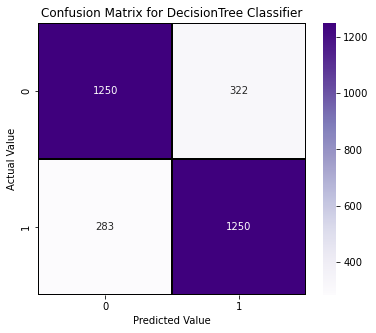

In [87]:
#Plotting the confusion Matrix

cm = confusion_matrix(y_test, pred_dtc)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f, ax = plt.subplots(figsize =(6,5))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("Predicted Value")
plt.ylabel("Actual Value")
plt.title('Confusion Matrix for DecisionTree Classifier')
plt.show()

Confusion matrix for dtc

## 5.3 Support Vector Classifier

In [89]:
#Finding the best random state:

Accu=0
RS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =i)
    sv=SVC()
    sv.fit(x_train, y_train)
    pred = sv.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>Accu:
        Accu=acc
        RS=i
print("Best accuracy is ",Accu," on Random_state ",RS)

Best accuracy is  0.8231884057971014  on Random_state  79


In [90]:
#Calling each kernel by defining svmkernel:

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state = RS)

def svmkernel(ker):
    svc=SVC(kernel=ker)
    svc.fit(x_train,y_train)
    svc.score(x_train,y_train)
    predsvc=svc.predict(x_test)
    print(accuracy_score(y_test,predsvc))
    print(confusion_matrix(y_test,predsvc))
    print(classification_report(y_test,predsvc))

In [91]:
svmkernel('linear')

0.778743961352657
[[1125  423]
 [ 264 1293]]
              precision    recall  f1-score   support

         0.0       0.81      0.73      0.77      1548
         1.0       0.75      0.83      0.79      1557

    accuracy                           0.78      3105
   macro avg       0.78      0.78      0.78      3105
weighted avg       0.78      0.78      0.78      3105



In [92]:
svmkernel('poly')

0.7990338164251207
[[1157  391]
 [ 233 1324]]
              precision    recall  f1-score   support

         0.0       0.83      0.75      0.79      1548
         1.0       0.77      0.85      0.81      1557

    accuracy                           0.80      3105
   macro avg       0.80      0.80      0.80      3105
weighted avg       0.80      0.80      0.80      3105



In [93]:
svmkernel('rbf')

0.8231884057971014
[[1219  329]
 [ 220 1337]]
              precision    recall  f1-score   support

         0.0       0.85      0.79      0.82      1548
         1.0       0.80      0.86      0.83      1557

    accuracy                           0.82      3105
   macro avg       0.82      0.82      0.82      3105
weighted avg       0.82      0.82      0.82      3105



Our accutacy is 82.31%

In [95]:
#Hyperparameter tuning of SVC for better accuracy:

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=RS)

sv=SVC()
sv_grid_param={'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}

gd_sr=GridSearchCV(estimator=sv,param_grid=sv_grid_param,scoring='accuracy',cv=5)

gd_sr.fit(x,y)

best_parameters=gd_sr.best_params_
print(best_parameters)

print(gd_sr.best_score_)

{'C': 10, 'gamma': 1, 'kernel': 'rbf'}
0.8694487523436607


In [126]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=79)
svc_h=SVC(kernel='rbf',gamma=1,C=10)
svc_h.fit(x_train,y_train)
svc_h.score(x_train,y_train)
pred_svc=svc_h.predict(x_test)
print(accuracy_score(y_test,pred_svc))
print(confusion_matrix(y_test,pred_svc))
print(classification_report(y_test,pred_svc))

0.8605475040257649
[[1375  173]
 [ 260 1297]]
              precision    recall  f1-score   support

         0.0       0.84      0.89      0.86      1548
         1.0       0.88      0.83      0.86      1557

    accuracy                           0.86      3105
   macro avg       0.86      0.86      0.86      3105
weighted avg       0.86      0.86      0.86      3105



Our score is improved after hyper parameter tuning

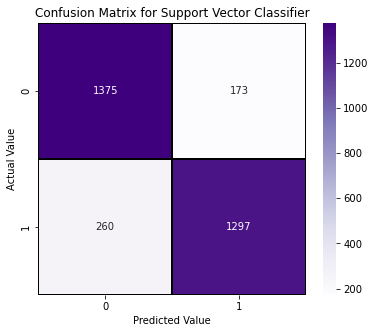

In [98]:
#Plotting the confusion Matrix

cm = confusion_matrix(y_test, pred_svc)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f, ax = plt.subplots(figsize =(6,5))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("Predicted Value")
plt.ylabel("Actual Value")
plt.title('Confusion Matrix for Support Vector Classifier')
plt.show()

## 4.4 Random Forest Classifier

In [99]:
#Finding the best random state

Accu=0
RS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =i)
    rf=RandomForestClassifier()
    rf.fit(x_train, y_train)
    pred = rf.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>Accu:
        Accu=acc
        RS=i
print("Best accuracy is ",Accu," on Random_state ",RS)

Best accuracy is  0.8673107890499195  on Random_state  81


In [100]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =RS)

rf=RandomForestClassifier()
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

0.8618357487922705
[[1307  208]
 [ 221 1369]]
              precision    recall  f1-score   support

         0.0       0.86      0.86      0.86      1515
         1.0       0.87      0.86      0.86      1590

    accuracy                           0.86      3105
   macro avg       0.86      0.86      0.86      3105
weighted avg       0.86      0.86      0.86      3105



In [101]:
#Hyper Parameter Tuning for Random Forest

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=RS)

rf=RandomForestClassifier()
rf_grid_param={"max_features": [1,3,10],
                "min_samples_split":[2,3,5,10],
                "min_samples_leaf":[1,3,10],
                "bootstrap":[False],
                "n_estimators":[200,300],
                "criterion":["gini",'entropy']}

gd_sr=GridSearchCV(estimator=rf,param_grid=rf_grid_param,scoring='accuracy',cv=5)

gd_sr.fit(x,y)

best_parameters=gd_sr.best_params_
print(best_parameters)

print(gd_sr.best_score_)

{'bootstrap': False, 'criterion': 'gini', 'max_features': 1, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 300}
0.8624950791882936


In [106]:
#Reinstating the tuned parameters:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =81)
rf_h=RandomForestClassifier(n_estimators=300,bootstrap=False,criterion='gini',
                         max_features=1,min_samples_leaf=1,min_samples_split=3)
rf_h.fit(x_train,y_train)
rf_h.score(x_train,y_train)
predrf=rf_h.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

0.8644122383252818
[[1330  185]
 [ 236 1354]]
              precision    recall  f1-score   support

         0.0       0.85      0.88      0.86      1515
         1.0       0.88      0.85      0.87      1590

    accuracy                           0.86      3105
   macro avg       0.86      0.86      0.86      3105
weighted avg       0.86      0.86      0.86      3105



slight change in score

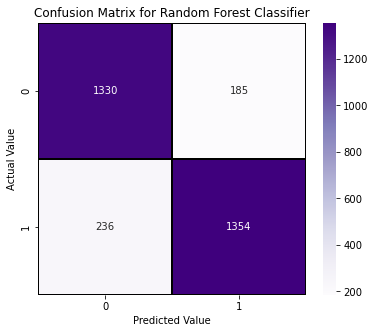

In [107]:
#Plotting the confusion Matrix

cm = confusion_matrix(y_test, predrf)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f, ax = plt.subplots(figsize =(6,5))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("Predicted Value")
plt.ylabel("Actual Value")
plt.title('Confusion Matrix for Random Forest Classifier')
plt.show()

## 4.5 KNN Classifier

In [108]:
#Finding the best random state:

Accu=0
RS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =i)
    knn=KNeighborsClassifier()
    knn.fit(x_train, y_train)
    pred = knn.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>Accu:
        Accu=acc
        RS=i
print("Best accuracy is ",Accu," on Random_state ",RS)

Best accuracy is  0.7948470209339774  on Random_state  42


In [109]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =RS)

knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
knn.score(x_train,y_train)
predknn=knn.predict(x_test)
print(accuracy_score(y_test,predknn))
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))

0.7948470209339774
[[1070  504]
 [ 133 1398]]
              precision    recall  f1-score   support

         0.0       0.89      0.68      0.77      1574
         1.0       0.74      0.91      0.81      1531

    accuracy                           0.79      3105
   macro avg       0.81      0.80      0.79      3105
weighted avg       0.81      0.79      0.79      3105



In [110]:
#HyperParameter Tuning of knn:

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=RS)

knn=KNeighborsClassifier()
knn_grid_param={"n_neighbors": np.arange(1, 25, 2),
                "weights": ["uniform","distance"],
                'metric' : ['minkowski','euclidean','manhattan'],
                'algorithm':['auto','ball_tree','kd_tree','brute']}

gd_sr=GridSearchCV(estimator=knn,param_grid=knn_grid_param,scoring='accuracy',cv=5)

gd_sr.fit(x,y)

best_parameters=gd_sr.best_params_
print(best_parameters)

print(gd_sr.best_score_)

{'algorithm': 'auto', 'metric': 'manhattan', 'n_neighbors': 1, 'weights': 'uniform'}
0.8384266011025421


In [128]:
#Reinstating the tuned parameters

knn_h=KNeighborsClassifier(n_neighbors=1,metric='manhattan',weights='uniform',algorithm='auto')
knn_h.fit(x_train,y_train)
knn_h.score(x_train,y_train)
predknn=knn_h.predict(x_test)
print(accuracy_score(y_test,predknn))
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))

0.8318840579710145
[[1197  351]
 [ 171 1386]]
              precision    recall  f1-score   support

         0.0       0.88      0.77      0.82      1548
         1.0       0.80      0.89      0.84      1557

    accuracy                           0.83      3105
   macro avg       0.84      0.83      0.83      3105
weighted avg       0.84      0.83      0.83      3105



Our score is increased

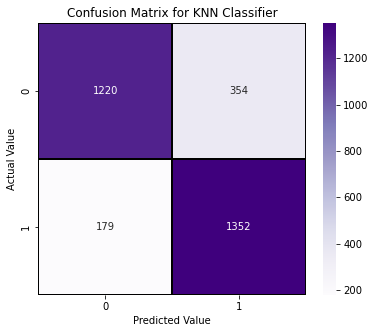

In [112]:
#Plotting the confusion Matrix

cm = confusion_matrix(y_test, predknn)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]

f, ax = plt.subplots(figsize =(6,5))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("Predicted Value")
plt.ylabel("Actual Value")
plt.title('Confusion Matrix for KNN Classifier')
plt.show()

## 4.6 Gradient Boosting Classifier

In [118]:
from sklearn.ensemble import GradientBoostingClassifier

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =None)

GBC=GradientBoostingClassifier()
GBC.fit(x_train,y_train)
predgb=GBC.predict(x_test)
print('Accuracy Score:',accuracy_score(y_test, predgb))
print('Confusion Matrix:',confusion_matrix(y_test, predgb))
print(classification_report(y_test,predgb))

Accuracy Score: 0.8431561996779388
Confusion Matrix: [[1261  282]
 [ 205 1357]]
              precision    recall  f1-score   support

         0.0       0.86      0.82      0.84      1543
         1.0       0.83      0.87      0.85      1562

    accuracy                           0.84      3105
   macro avg       0.84      0.84      0.84      3105
weighted avg       0.84      0.84      0.84      3105



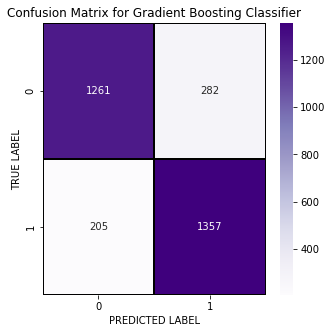

In [119]:
cm = confusion_matrix(y_test, predgb)

x_axis_labels = ["0","1"]
y_axis_labels = ["0","1"]


f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Gradient Boosting Classifier')
plt.show()

# Cross Validation Score

In [120]:
score=cross_val_score(lr,x,y,cv=5)
score_a=score.mean()
print("Cross_Val_Score of LR:",score_a)

Cross_Val_Score of LR: 0.7734837478956671


In [121]:
score=cross_val_score(dtc,x,y,cv=5)
score_b=score.mean()
print("Cross_Val_Score of DTC:",score_b)

Cross_Val_Score of DTC: 0.7705873452833758


In [122]:
score=cross_val_score(svc_h,x,y,cv=5)
score_c=score.mean()
print("Cross_Val_Score of SVC:",score_c)

Cross_Val_Score of SVC: 0.8694487523436607


In [123]:
score=cross_val_score(rf_h,x,y,cv=5)
score_d=score.mean()
print("Cross_Val_Score of RF:",score_d)

Cross_Val_Score of RF: 0.8597896717824429


In [124]:
score=cross_val_score(knn_h,x,y,cv=5)
score_e=score.mean()
print("Cross_Val_Score of KNN:",score_e)

Cross_Val_Score of KNN: 0.8384266011025421


In [125]:
score=cross_val_score(GBC,x,y,cv=5)
score_f=score.mean()
print("Cross_Val_Score of Gradient Boosting:",score_f)

Cross_Val_Score of Gradient Boosting: 0.8332132258343199


Text(0.5, 1.0, 'Cross Validation Scores')

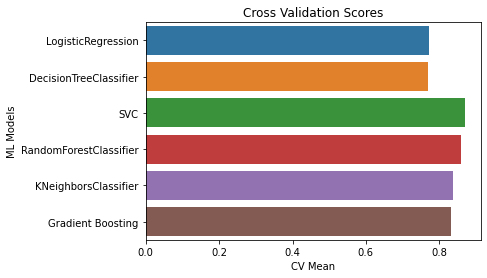

In [127]:
cv_result=[score_a,score_b,score_c,score_d,score_e,score_f]
cv_results = pd.DataFrame({"Cross Validation Means":cv_result, "ML Models":[ "LogisticRegression",
            "DecisionTreeClassifier", "SVC","RandomForestClassifier","KNeighborsClassifier",
            "Gradient Boosting"]})

g = sns.barplot("Cross Validation Means", "ML Models", data = cv_results)
g.set_xlabel("CV Mean")
g.set_title("Cross Validation Scores")

Text(0.5, 1.0, 'Accuracy scores of different Models')

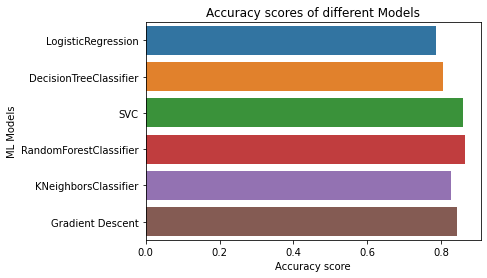

In [129]:
score_lr=0.785829307568438 
score_dtc=0.8051529790660226
score_svc=0.8605475040257649
score_rf=0.8644122383252818
score_knn=0.828341384863124
score_gbc=0.8431561996779388

acc_result=[score_lr,score_dtc,score_svc,score_rf,score_knn,score_gbc]
acc_results = pd.DataFrame({"Accuracy Scores":acc_result, "ML Models":[ "LogisticRegression",
            "DecisionTreeClassifier", "SVC","RandomForestClassifier","KNeighborsClassifier",
            "Gradient Descent"]})

g = sns.barplot("Accuracy Scores", "ML Models", data = acc_results)
g.set_xlabel("Accuracy score")
g.set_title("Accuracy scores of different Models")

## From Above 2 plots, we can see SVC and Random Forest are the best Models. We can check the AUC ROC Curve as well before deciding the Final Model

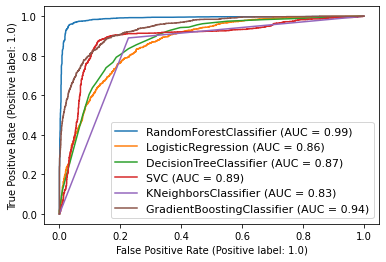

In [130]:
# Plotting AUC-ROC Curve for all the models used here 

from sklearn.metrics import plot_roc_curve 

disp = plot_roc_curve(rf_h,x_test,y_test)
plot_roc_curve(lr, x_test, y_test, ax=disp.ax_)    
plot_roc_curve(dtc,x_test, y_test, ax=disp.ax_)
plot_roc_curve(svc_h, x_test, y_test, ax=disp.ax_)
plot_roc_curve(knn_h, x_test, y_test, ax=disp.ax_)
plot_roc_curve(GBC, x_test, y_test, ax=disp.ax_)

plt.legend(prop={'size':11}, loc='lower right')
plt.show()

# We can take Random Forest as Final Model

In [131]:
#Final model as Random Forest
#{'bootstrap': False, 'criterion': 'gini', 'max_features': 1, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 300}

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =81)

Final_Model=RandomForestClassifier(n_estimators=300,bootstrap=False,criterion='gini',
                         max_features=1,min_samples_leaf=1,min_samples_split=3)
Final_Model.fit(x_train,y_train)
predrf=Final_Model.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

0.8650563607085346
[[1325  190]
 [ 229 1361]]
              precision    recall  f1-score   support

         0.0       0.85      0.87      0.86      1515
         1.0       0.88      0.86      0.87      1590

    accuracy                           0.87      3105
   macro avg       0.87      0.87      0.87      3105
weighted avg       0.87      0.87      0.87      3105



# AUC-ROC Curve

In [132]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

y_pred_prob=Final_Model.predict_proba(x_test)[:,1]
y_pred_prob

array([0.12166667, 0.8       , 0.22833333, ..., 0.975     , 0.97666667,
       0.005     ])

In [133]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

In [134]:
fpr

array([0.        , 0.00132013, 0.0019802 , 0.00330033, 0.00462046,
       0.00462046, 0.00462046, 0.00594059, 0.00594059, 0.00660066,
       0.00660066, 0.00660066, 0.00726073, 0.00726073, 0.00726073,
       0.00792079, 0.00792079, 0.00990099, 0.01056106, 0.01056106,
       0.01122112, 0.01122112, 0.01122112, 0.01122112, 0.01188119,
       0.01188119, 0.01188119, 0.01188119, 0.01188119, 0.01188119,
       0.01188119, 0.01254125, 0.01254125, 0.01254125, 0.01254125,
       0.01254125, 0.01254125, 0.01254125, 0.01320132, 0.01320132,
       0.01320132, 0.01386139, 0.01386139, 0.01452145, 0.01452145,
       0.01518152, 0.01584158, 0.01584158, 0.01584158, 0.01584158,
       0.01584158, 0.01584158, 0.01584158, 0.01584158, 0.01584158,
       0.01584158, 0.01584158, 0.01584158, 0.01584158, 0.01584158,
       0.01584158, 0.01584158, 0.01584158, 0.01584158, 0.01584158,
       0.01584158, 0.01584158, 0.01584158, 0.01650165, 0.01650165,
       0.01716172, 0.01716172, 0.01782178, 0.01782178, 0.01848

In [135]:
tpr

array([0.        , 0.06666667, 0.08742138, 0.10251572, 0.11257862,
       0.12767296, 0.13710692, 0.1490566 , 0.15534591, 0.16540881,
       0.17232704, 0.17987421, 0.19119497, 0.19559748, 0.20188679,
       0.20754717, 0.21572327, 0.2245283 , 0.22955975, 0.23647799,
       0.24150943, 0.24654088, 0.25031447, 0.25786164, 0.26792453,
       0.27484277, 0.27924528, 0.28490566, 0.28993711, 0.29433962,
       0.29748428, 0.30125786, 0.31006289, 0.31572327, 0.31949686,
       0.32264151, 0.32704403, 0.32955975, 0.33584906, 0.3408805 ,
       0.34402516, 0.34654088, 0.3509434 , 0.35220126, 0.35849057,
       0.36415094, 0.36792453, 0.36981132, 0.37421384, 0.37735849,
       0.38301887, 0.38616352, 0.39056604, 0.39622642, 0.39937107,
       0.40754717, 0.40943396, 0.41823899, 0.42075472, 0.42389937,
       0.4327044 , 0.43396226, 0.43647799, 0.44213836, 0.44654088,
       0.44968553, 0.45345912, 0.45786164, 0.45974843, 0.46226415,
       0.46352201, 0.46540881, 0.4672956 , 0.47232704, 0.47798

In [136]:
thresholds

array([2.00000000e+00, 1.00000000e+00, 9.98333333e-01, 9.96666667e-01,
       9.95000000e-01, 9.93333333e-01, 9.91666667e-01, 9.90000000e-01,
       9.88333333e-01, 9.86666667e-01, 9.85000000e-01, 9.83333333e-01,
       9.81666667e-01, 9.80000000e-01, 9.78333333e-01, 9.76666667e-01,
       9.75000000e-01, 9.73333333e-01, 9.71666667e-01, 9.70000000e-01,
       9.68333333e-01, 9.66666667e-01, 9.65000000e-01, 9.63333333e-01,
       9.61666667e-01, 9.60000000e-01, 9.58333333e-01, 9.56666667e-01,
       9.55000000e-01, 9.53333333e-01, 9.51666667e-01, 9.50000000e-01,
       9.46666667e-01, 9.45000000e-01, 9.43333333e-01, 9.41666667e-01,
       9.40000000e-01, 9.38333333e-01, 9.36666667e-01, 9.35000000e-01,
       9.33333333e-01, 9.31666667e-01, 9.30000000e-01, 9.28333333e-01,
       9.26666667e-01, 9.25000000e-01, 9.23333333e-01, 9.21666667e-01,
       9.20000000e-01, 9.18333333e-01, 9.16666667e-01, 9.15000000e-01,
       9.13333333e-01, 9.11666667e-01, 9.10000000e-01, 9.08333333e-01,
      

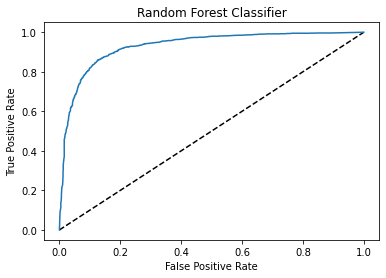

In [137]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest Classifier')
plt.show()

In [138]:
auc_score=roc_auc_score(y_test,Final_Model.predict(x_test))
print((auc_score)*100)

86.52811507565852


## Saving the Final_Model to pkl

In [139]:
import joblib
joblib.dump(Final_Model,'Customer_Churn_rf.pkl')

['Customer_Churn_rf.pkl']

<AxesSubplot:>

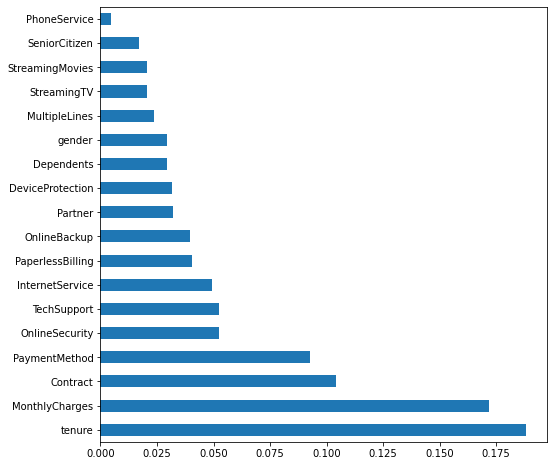

In [140]:
#Checking Feature Importance with Random Forest Model

feat_importances = pd.Series(Final_Model.feature_importances_, index=x.columns)
feat_importances.nlargest(100).plot(kind='barh',figsize=(8,8))

### Tenure, MonthlyCharges and Contract are the most Important features according to my model.

## Predictions

In [141]:
# Loading the saved model
model=joblib.load("Customer_Churn_rf.pkl")

#Prediction
prediction = model.predict(x_test)
prediction

array([0., 1., 0., ..., 1., 1., 0.])

In [142]:
#saving as dataframe

base = pd.DataFrame()
base["actual"] = y_test
base["predictions"] = prediction
base

,actual,predictions
3929,0.0,0.0
9287,1.0,1.0
602,0.0,0.0
7135,1.0,1.0
7365,1.0,1.0
...,...,...
5540,1.0,1.0
2853,0.0,0.0
9373,1.0,1.0
4139,0.0,1.0


All values are almost same.

In [143]:
#Adding another column of thier difference. 

base['difference']=base['actual']-base['predictions']

#If 0 then actual and predicted are same. else its different

print(base['difference'].value_counts())

 0.0    2686
 1.0     229
-1.0     190
Name: difference, dtype: int64


In [144]:
a=(419/2686)*100
a

15.5994043186895

### We have 15% error with this Model